## Objective:
The main objective of this dataset is to assess and predict water potability based on water quality attributes. 

It can be used for evaluating the safety and suitability of water sources for human consumption. 

making informed decisions about water treatment, and ensuring compliance with water quality standards.

### Machine Learning Task:
This dataset is suitable for a supervised binary classification task, where machine learning models can be trained to predict water potability based on the provided water quality attributes. 

The models aim to classify water samples as potable (1) or not potable (0).

#### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Importing Data

In [39]:
data = pd.read_csv("data.csv")
# Viewing first 5 rows
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0
1,NaN,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1
3,7.647872,160.774353,29000.589712,7.217409,NaN,438.800961,13.182501,67.099969,3.078673,1
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0


#### Data Exploration & Preprocessing

In [28]:
# Checking data length
len(data)

2620

In [29]:
# Checking for missing values in data
data.isnull().sum()

ph                 386
Hardness             0
Solids               0
Chloramines          0
Sulfate            621
Conductivity         0
Organic_carbon       0
Trihalomethanes    125
Turbidity            0
Potability           0
dtype: int64

In [30]:
# Checking dataset data types
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [40]:
# Filling all missing values with the mean value of each column

# Filling "ph" column
data["ph"].fillna(data["ph"].mean(), inplace=True)

# Filling "Sulfate" column
data["Sulfate"].fillna(data["Sulfate"].mean(), inplace=True)

# Filling "Trihalomethanes" column
data["Trihalomethanes"].fillna(data["Trihalomethanes"].mean(), inplace=True)

# Checking for missing values
data.isnull().mean()

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

#### Data Visualization

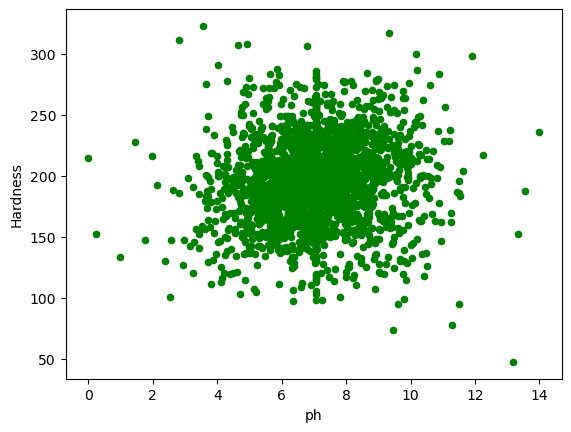

In [32]:
# Plotting Hardness by potability
data.plot(x="ph", y="Hardness", kind='scatter', color='Green');

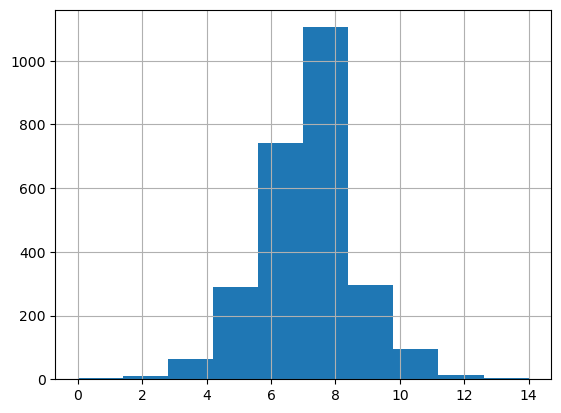

In [33]:
# Plotting histogram distribution of ph levels
data["ph"].hist().plot();

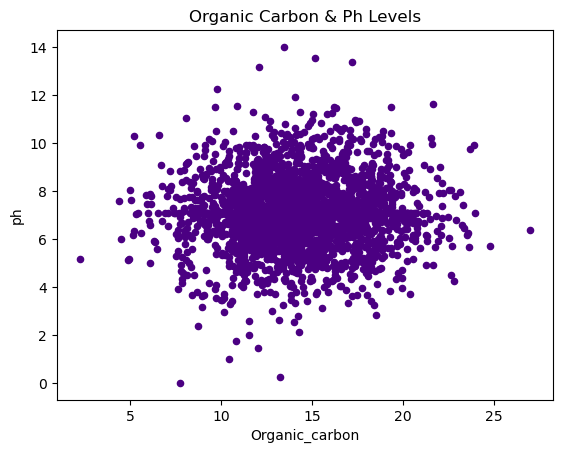

In [34]:
# Plotting ph levels by Organic-carbon
data.plot(x="Organic_carbon", y="ph", title='Organic Carbon & Ph Levels', kind='scatter', color='Indigo');

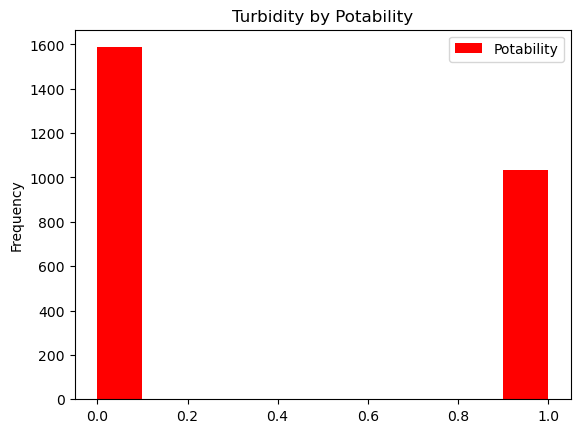

In [35]:
# Plotting turbidity by potability
data.plot(x="Turbidity", y="Potability", title='Turbidity by Potability', kind='hist', color='red');

#### Model Building

In [45]:
# Splitting data into features and label
x = data.drop("Potability", axis=1)
y = data["Potability"]

# Splitting data into training & test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3)

# Importing KNN model
from sklearn.neighbors import KNeighborsClassifier
# Instantiating the model
knn = KNeighborsClassifier()
# Fitting on the train data split
knn.fit(x_train, y_train)
# Testing on test data
knn_result = knn.score(x_test, y_test)

# Importing Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200) # Tuning the estimators to 200 
rf.fit(x_train, y_train)
rf_result = rf_model.score(x_test, y_test)

## Model Evaluation

In [46]:
# KNN model & Random Forest Classifier result
print(knn_result, rf_result)

0.544529262086514 0.6334772738268022


#### Model comparison

In [48]:
# Making predictions with the Random Forest Classifier model
y_pred = rf.predict(x_test)

In [50]:
# Checking the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       468
           1       0.62      0.30      0.41       318

    accuracy                           0.64       786
   macro avg       0.64      0.59      0.58       786
weighted avg       0.64      0.64      0.61       786



#### Improving the Random Classifier model using RandomizedSearchCV

In [57]:
# Create a hyperparameter frid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 12],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [58]:
# Tune RandomForestClassifier
np.random.seed(42)

from sklearn.model_selection import RandomizedSearchCV
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 12],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [59]:
# Getting the best hyperparameter
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 12}

In [60]:
# Evaluating the randomized search cv on test data
rs_rf.score(x_test, y_test)

0.638676844783715

In [61]:
rf_result

0.6334772738268022

#### Evaluating on RandomizedSearchCV results

In [63]:
y_preds = rs_rf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75       468
           1       0.63      0.25      0.36       318

    accuracy                           0.64       786
   macro avg       0.64      0.58      0.55       786
weighted avg       0.64      0.64      0.59       786



#### Plotting confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[422  46]
 [238  80]]


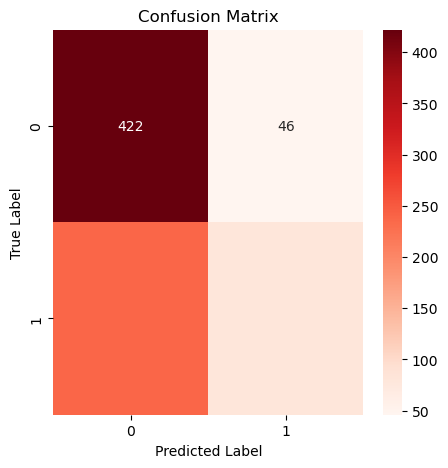

In [70]:
import seaborn as sns

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

 # Plotting a confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show();

### Saving the RandomForest model

In [71]:
from joblib import dump, load
dump(rs_rf, filename="rs_rf_model.joblib")

['rs_rf_model.joblib']